In [1]:
#DATA AND PACKAGES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#A7EBF2', '#AAAAFF', '#f2eb9d'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#25d9f5', '#0000FF', '#f5c711'])

colors = ['#FFAAAA', '#AAFFAA','#a7ebf2', '#AAAAFF', '#f2eb9d']
colors_bold = ['#FF0000', '#00FF00','#25d9f5', '#0000FF', '#f5c711']

%matplotlib inline

shopping_data = pd.read_csv('shopping-data.csv')
print(shopping_data.head)
data = shopping_data.iloc[:, 3:5].values

#normalize data into the same scale
#data_scaled = normalize(data)

#Standardize data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

<bound method NDFrame.head of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
5             6  Female   22                  17                      76
6             7  Female   35                  18                       6
7             8  Female   23                  18                      94
8             9    Male   64                  19                       3
9            10  Female   30                  19                      72
10           11    Male   67                  19                      14
11           12  Female   35                  19                      99
12           13  Fema

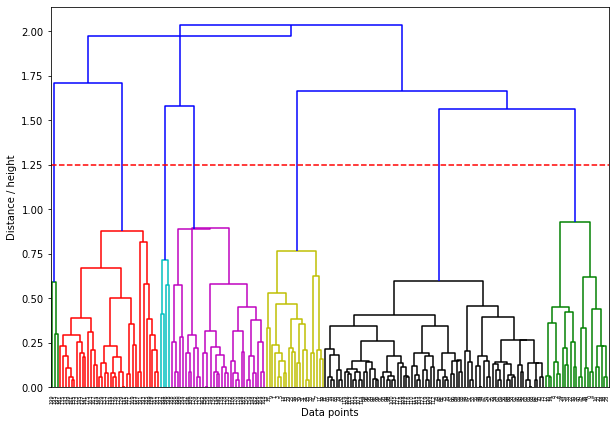

In [3]:
#SHOPPING DATASET using centroid linkage

plt.figure(figsize=(10, 7))
plt.xlabel('Data points')
plt.ylabel('Distance / height')
dend = shc.dendrogram(shc.linkage(data_standardized, method='centroid'))

#plot the threshold so it cuts the tallest vertical line
plt.axhline(y=1.25, color='r', linestyle='--')

#we can see that we have three clusters at the threshold

For n_clusters = 2, silhouette score is 0.3842337621772661)
For n_clusters = 3, silhouette score is 0.4610481446570447)
For n_clusters = 4, silhouette score is 0.4925507715349343)
For n_clusters = 5, silhouette score is 0.5538089226688662)
For n_clusters = 6, silhouette score is 0.5386761871036926)
For n_clusters = 7, silhouette score is 0.5197949293475768)
For n_clusters = 8, silhouette score is 0.4308617778221774)
For n_clusters = 9, silhouette score is 0.43768997758154127)


Text(0, 0.5, 'Silhuette width')

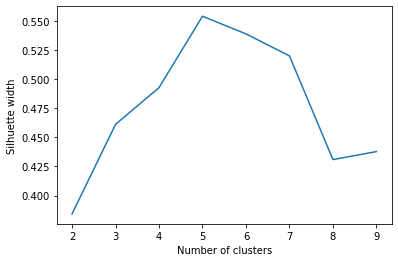

In [4]:
#SHOPPING DATASET using ward linkage

#Determine number of clusters based on silhuette width
range_n_clusters = list (range(2,10))
scores = []
for n in range_n_clusters:
    cluster = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='ward')
    preds = cluster.fit_predict(data_standardized)

    score = silhouette_score(data_standardized, preds)
    scores.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n, score))
    
    
plt.plot(range_n_clusters, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhuette width')

The two longest distances are:
5.044926246271123
5.09893075323372
So we chose the second distance, corresponding to 5 clusters


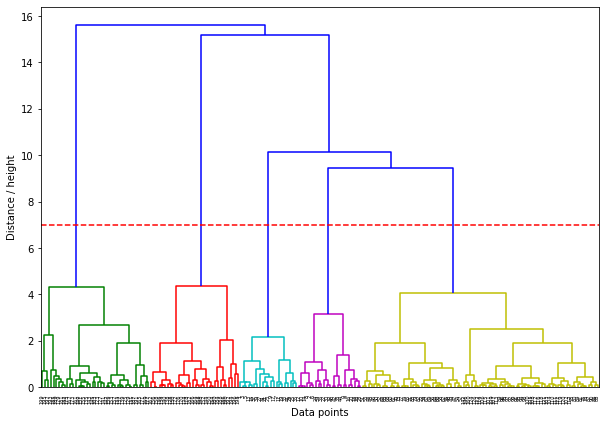

In [404]:
%matplotlib inline

plt.figure(figsize=(10, 7))
plt.xlabel('Data points')
plt.ylabel('Distance / height')
Z = shc.linkage(data_standardized, method='ward')
dend = shc.dendrogram(shc.linkage(data_standardized, method='ward'), color_threshold = 0.5*max(Z[:,2]))

#plot the threshold so it cuts the tallest vertical line
plt.axhline(y=7, color='r', linestyle='--')

print('The two longest distances are:')
print(Z[197,2]-Z[196,2])
print(Z[195,2]-Z[194,2])
print('So we chose the second distance, corresponding to 5 clusters')

Text(0, 0.5, 'Spending Score (1-100) (standardized)')

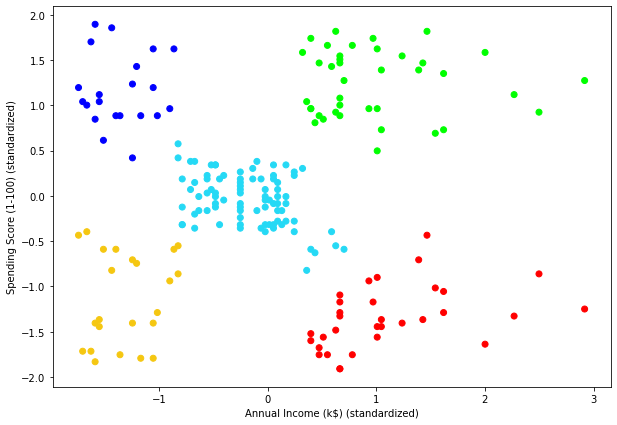

In [5]:
#apply hierarchical clustering for 2 clusters with Agglomerative Clustering:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_standardized)

#visualize clusters
plt.figure(figsize=(10, 7))  
plt.scatter(data_standardized[:,0],data_standardized[:,1], c=cluster.labels_, cmap=cmap_bold)
plt.xlabel('Annual Income (k$) (standardized)')
plt.ylabel('Spending Score (1-100) (standardized)')

For n_clusters = 2, silhouette score is 0.40267732960495795)
For n_clusters = 3, silhouette score is 0.43976779182142395)
For n_clusters = 4, silhouette score is 0.44835227011618684)
For n_clusters = 5, silhouette score is 0.5538037318866424)
For n_clusters = 6, silhouette score is 0.44143357094966773)
For n_clusters = 7, silhouette score is 0.4395469868524052)
For n_clusters = 8, silhouette score is 0.442796388471523)
For n_clusters = 9, silhouette score is 0.4247233803191658)


Text(0, 0.5, 'Silhuette width')

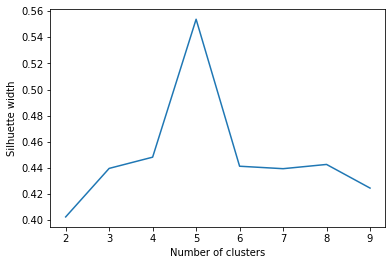

In [6]:
## GMM 

#Determine number of clusters based on silhuette width using diag

from sklearn.metrics import silhouette_score
range_n_clusters = list (range(2,10))
scores = []
for n_clusters in range_n_clusters:
    gmm = GaussianMixture(n_components=n_clusters, random_state=42, covariance_type='spherical')
    preds = gmm.fit_predict(data_standardized)

    score = silhouette_score(data_standardized, preds)
    scores.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    
    
plt.plot(range_n_clusters, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhuette width')

NameError: name 'mpl' is not defined

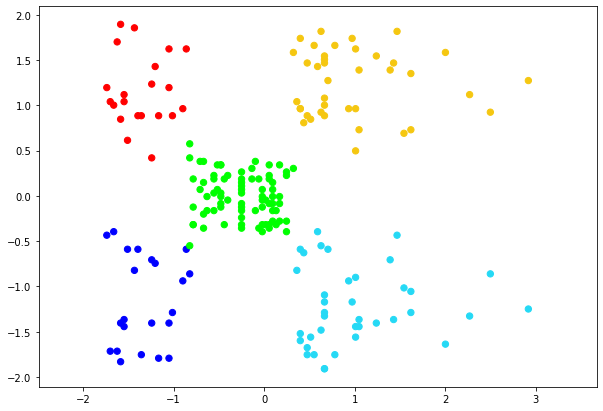

In [7]:

%matplotlib inline


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')
        
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap=cmap_bold, zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, cmap=cmap_bold, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        make_ellipses(gmm, ax)
        
gmm = GaussianMixture(n_components=5, random_state=42, covariance_type='spherical')

plt.figure(figsize=(10, 7)) 
plot_gmm(gmm, data_standardized)
plt.xlabel('Annual Income (k$) (standardized)')
plt.ylabel('Spending Score (1-100) (standardized)')

For n_clusters = 2, silhouette score is 0.37842453004628623)
For n_clusters = 3, silhouette score is 0.45936843078762557)
For n_clusters = 4, silhouette score is 0.49017754129087293)
For n_clusters = 5, silhouette score is 0.5518866863481336)
For n_clusters = 6, silhouette score is 0.3999325044711406)
For n_clusters = 7, silhouette score is 0.4225371951277161)
For n_clusters = 8, silhouette score is 0.45211242102118987)
For n_clusters = 9, silhouette score is 0.44309899925020635)


Text(0, 0.5, 'Silhuette width')

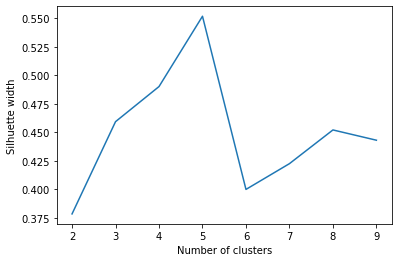

In [408]:
#Determine number of clusters based on silhuette width using linkage tied

from sklearn.metrics import silhouette_score
range_n_clusters = list (range(2,10))
scores = []
for n_clusters in range_n_clusters:
    gmm = GaussianMixture(n_components=n_clusters, random_state=42, covariance_type='tied')
    preds = gmm.fit_predict(data_standardized)

    score = silhouette_score(data_standardized, preds)
    scores.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    
    
plt.plot(range_n_clusters, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhuette width')

NameError: name 'mpl' is not defined

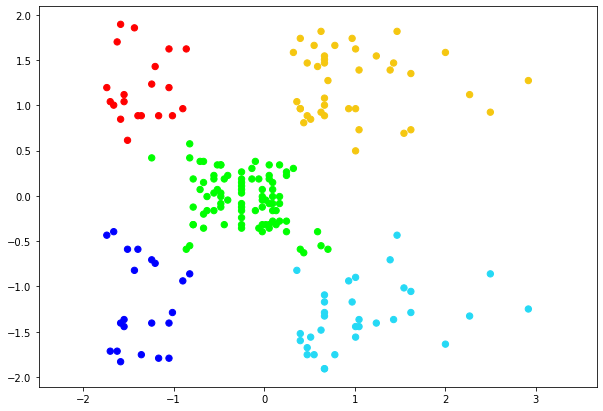

In [8]:
gmm = GaussianMixture(n_components=5, random_state=42, covariance_type='tied')

plt.figure(figsize=(10, 7)) 
plot_gmm(gmm, data_standardized)
plt.xlabel('Annual Income (k$) (standardized)')
plt.ylabel('Spending Score (1-100) (standardized)')

Text(0, 0.5, 'Spending Score (1-100) (standardized)')

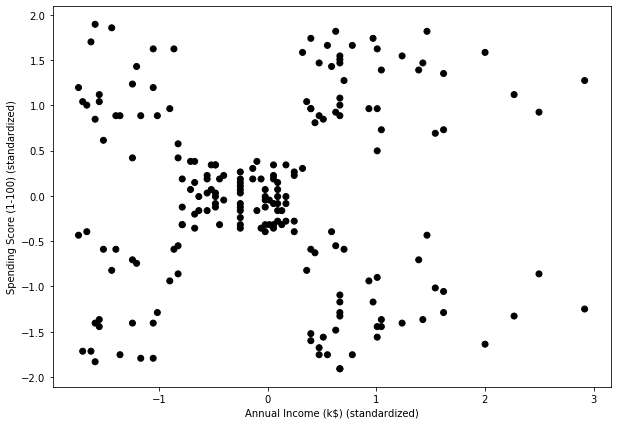

In [410]:
#Simple scatter plot of data

cmap_black = ListedColormap(['#000000', '#000000', '#000000', '#000000', '#000000'])


#visualize clusters
plt.figure(figsize=(10, 7))  
plt.scatter(data_standardized[:,0],data_standardized[:,1], c=cluster.labels_, cmap=cmap_black)
plt.xlabel('Annual Income (k$) (standardized)')
plt.ylabel('Spending Score (1-100) (standardized)')

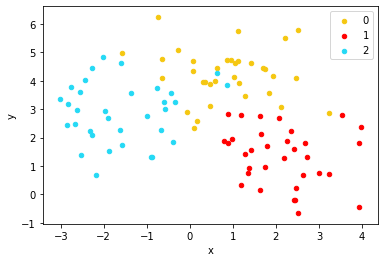

In [9]:
#RANDOMLY GENERATED BLOB DATA SET

colors_bold = ['#f5c711', '#FF0000', '#25d9f5' , '#00FF00', '#0000FF']

from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=0)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors_bold[key])
pyplot.show()

Text(0, 0.5, 'Silhuette width')

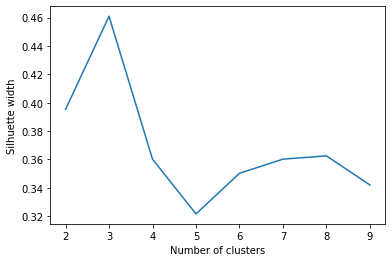

In [10]:
#Determine number of clusters based on silhuette width
range_n_clusters = list (range(2,10))
scores = []
for n in range_n_clusters:
    cluster = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='ward')
    preds = cluster.fit_predict(df)

    score = silhouette_score(df, preds)
    scores.append(score)
    #print("For n_clusters = {}, silhouette score is {})".format(n, score))
      
plt.plot(range_n_clusters, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhuette width')

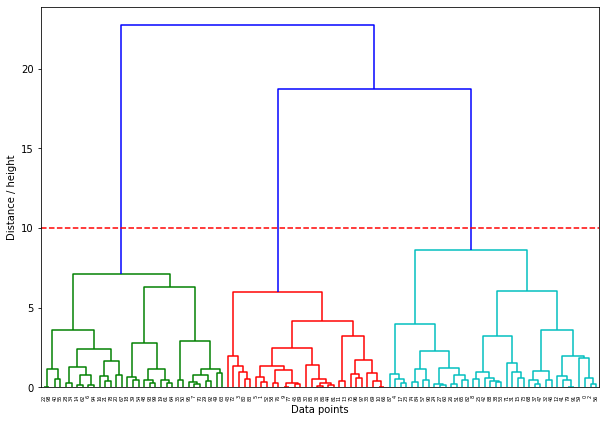

In [11]:
plt.figure(figsize=(10, 7))
plt.xlabel('Data points')
plt.ylabel('Distance / height')
Z = shc.linkage(df, method='ward')
dend = shc.dendrogram(shc.linkage(df, method='ward'), color_threshold = 0.5*max(Z[:,2]))

#plot the threshold so it cuts the tallest vertical line
plt.axhline(y=10, color='r', linestyle='--')

Text(0, 0.5, 'Feature 2')

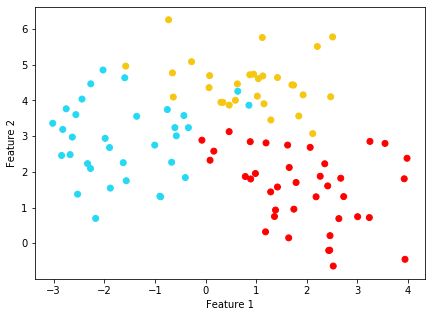

In [438]:
#apply hierarchical clustering for 2 clusters with Agglomerative Clustering:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df)

#visualize clusters
plt.figure(figsize=(7, 5))  
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster.labels_, cmap=cmap_bold)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Text(0, 0.5, 'Feature 2')

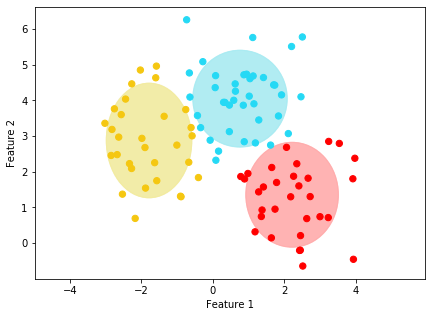

In [452]:
gmm = GaussianMixture(n_components=3, random_state=42, covariance_type='diag')

df_iloc = df.iloc[:, 0:2].values

colors = ['#FFAAAA', '#a7ebf2','#f2eb9d']
plt.figure(figsize=(7, 5)) 
plot_gmm(gmm, df_iloc)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

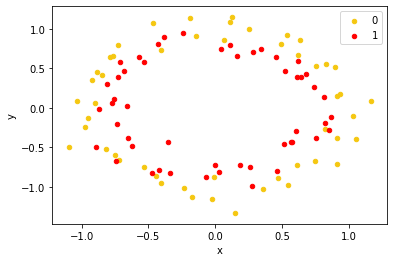

In [468]:
#RANDOMLY GENERATED MOON / CIRCLE DATA SET

from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

colors_bold = ['#f5c711', '#FF0000', '#25d9f5' , '#00FF00', '#0000FF']

from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=0)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors_bold[key])
pyplot.show()

Text(0, 0.5, 'Silhuette width')

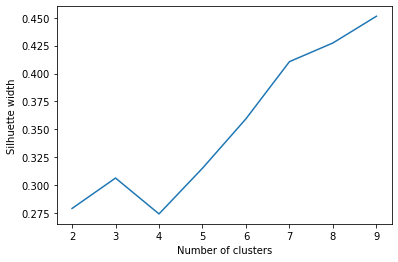

In [469]:
#Determine number of clusters based on silhuette width
range_n_clusters = list (range(2,10))
scores = []
for n in range_n_clusters:
    cluster = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='ward')
    preds = cluster.fit_predict(df)

    score = silhouette_score(df, preds)
    scores.append(score)
    #print("For n_clusters = {}, silhouette score is {})".format(n, score))
      
plt.plot(range_n_clusters, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhuette width')

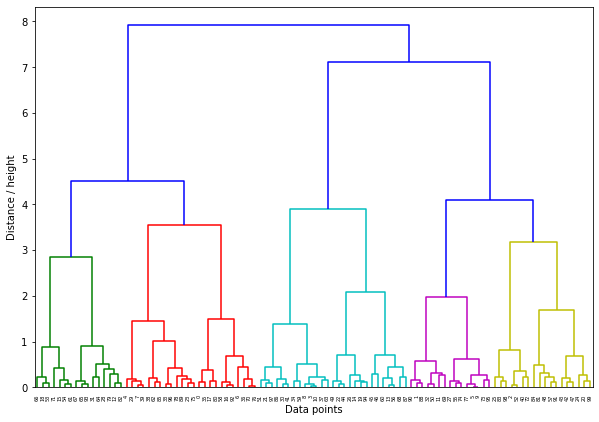

In [470]:
plt.figure(figsize=(10, 7))
plt.xlabel('Data points')
plt.ylabel('Distance / height')
Z = shc.linkage(df, method='ward')
dend = shc.dendrogram(shc.linkage(df, method='ward'), color_threshold = 0.5*max(Z[:,2]))

#plot the threshold so it cuts the tallest vertical line
plt.axhline(y=10, color='r', linestyle='--')

Text(0, 0.5, 'Feature 2')

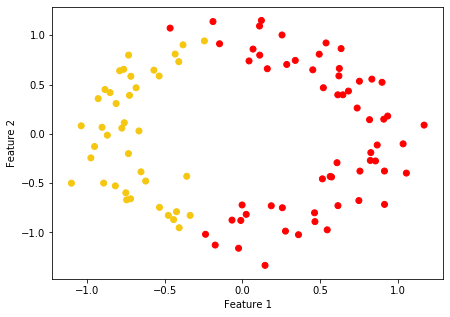

In [471]:
#apply hierarchical clustering for 2 clusters with Agglomerative Clustering:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df)

#visualize clusters
plt.figure(figsize=(7, 5))  
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster.labels_, cmap=cmap_bold)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Text(0, 0.5, 'Feature 2')

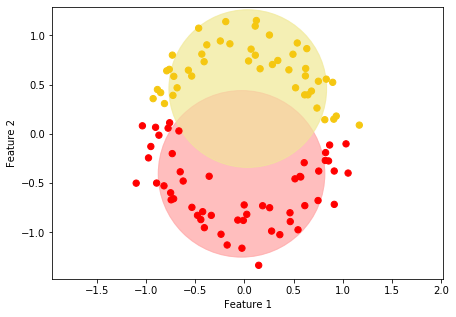

In [472]:
gmm = GaussianMixture(n_components=2, random_state=42, covariance_type='spherical')

df_iloc = df.iloc[:, 0:2].values

colors = ['#FFAAAA', '#AAFFAA','#a7ebf2', '#AAAAFF', '#f2eb9d']
colors = ['#FFAAAA','#f2eb9d']
plt.figure(figsize=(7, 5)) 
plot_gmm(gmm, df_iloc)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')